In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\bikki\AppData\Local\Temp\ipykernel_11736\2660915427.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
df['sex']=df['sex'].astype('category')
df['sex']=df['sex'].cat.codes

df['smoker']=df['smoker'].astype('category')
df['smoker']=df['smoker'].cat.codes

df['region']=df['region'].astype('category')
df['region']=df['region'].cat.codes

In [4]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
x=df.drop(columns='expenses')
x

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [7]:
y=df['expenses']
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [9]:
x_train

,age,sex,bmi,children,smoker,region
744,50,1,26.4,0,0,1
363,21,0,26.4,1,0,3
10,25,1,26.2,0,0,0
970,50,0,28.2,3,0,2
634,51,1,39.7,1,0,3
...,...,...,...,...,...,...
715,60,1,28.9,0,0,3
905,26,0,29.4,2,0,0
1096,51,0,35.0,2,1,0
235,40,0,22.2,2,1,2


In [10]:
y_train

744      8827.21
363      2597.78
10       2721.32
970     10702.64
634      9391.35
          ...   
715     12146.97
905      4564.19
1096    44641.20
235     19444.27
1061    11554.22
Name: expenses, Length: 936, dtype: float64

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [12]:
m=model.coef_
m

array([  252.13470318,  -280.97305715,   316.64757044,   351.49138291,
       24043.59067977,  -318.24319255])

In [13]:
c=model.intercept_
c

-10941.060734637846

In [14]:
y_train_pred=model.predict(x_train)
y_train_pred[:5]

array([ 9425.95403451,  2110.02569715,  3377.50013338, 11013.12367465,
       13604.50642238])

In [15]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.7544286489488294

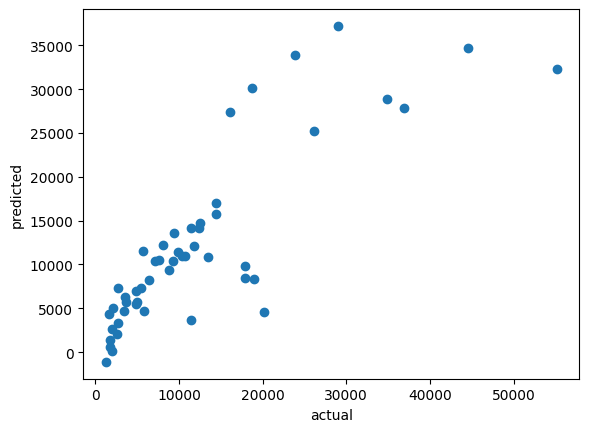

In [16]:
plt.scatter(y_train[:50],y_train_pred[:50])
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

In [17]:
x_test[:10]

,age,sex,bmi,children,smoker,region
559,19,1,35.5,0,0,1
1087,57,1,31.5,0,0,1
1020,51,1,37.0,0,0,3
460,49,0,36.6,3,0,2
802,21,1,22.3,1,0,3
298,31,1,34.4,3,1,1
481,49,1,37.5,2,0,2
616,56,0,28.6,0,0,0
763,27,1,26.0,0,0,0
750,37,0,26.4,0,1,2


In [18]:
y_test[:10]

559      1646.43
1087    11353.23
1020     8798.59
460     10381.48
802      2103.08
298     38746.36
481      9304.70
616     11658.12
763      3070.81
750     19539.24
Name: expenses, dtype: float64

In [20]:
y_pred_test=model.predict(x_test)
y_pred_test[:10]

array([ 4491.27112683, 12805.79956605, 12398.06659928, 13420.82856317,
         530.79760118, 32266.64006605, 13073.3469365 , 12234.60315829,
        3818.44002566, 30154.52343749])

In [22]:
r2_score(y_test,y_pred_test)

0.7403685560065114